# KNN(k nearest neighbors)

In [0]:
#--it is instance based

In [0]:
#L1 distance --manhattan distance.
#L2 distance --Euclid distance.
import numpy as np

In [0]:
a=np.asarray([2,3,1])
b=np.asarray([1,4,8])
l2=(np.sum((b-a)**2))**0.5
print(l2)

7.14142842854285


In [0]:
l1=(np.sum(abs(b-a)))
l1

9

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mean1=np.array([1,0]) #covarience shows spreadness of data
cov1=np.array([[1,0.1],[0.1,1.2]]) #1 shows horizontally spread of data, both 0.1 show spread of data horizontally,1.2 shows vertically spread of data
dist1=np.random.multivariate_normal(mean1,cov1,500)
print(dist1.shape)

mean1=np.array([4,5])
cov1=np.array([[1,0.1],[0.1,1.2]])
dist2=np.random.multivariate_normal(mean1,cov1,500)
print(dist2.shape)

(500, 2)
(500, 2)


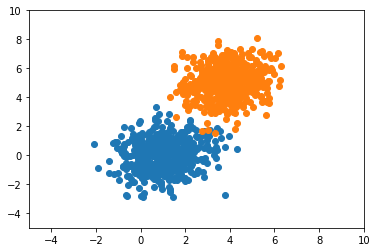

In [0]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,-1])
plt.scatter(dist2[:,0],dist2[:,-1])
plt.show()

In [0]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
print(data.shape)
data.mean(axis=0)

(1000, 3)


array([2.53277911, 2.4566892 , 0.5       ])

In [0]:
np.random.shuffle(data)
data[:10]

array([[ 1.28113885,  1.41864117,  0.        ],
       [ 1.5799219 , -0.26963802,  0.        ],
       [ 1.79135772, -1.12720867,  0.        ],
       [-0.99130441, -0.56085428,  0.        ],
       [ 4.08990172,  4.33602714,  1.        ],
       [ 4.43016041,  4.3096689 ,  1.        ],
       [ 4.56069663,  6.88305994,  1.        ],
       [ 3.16882461,  4.196423  ,  1.        ],
       [ 1.08941309,  1.55376706,  0.        ],
       [ 3.28485283,  5.65434389,  1.        ]])

In [0]:
def distance (a,b):
    return (np.sum((b-a)**2))**0.5

In [0]:
def knn(x_train,y_train,test_point,k=7):
    distances=[]
    m=x_train.shape[0]
    for i in range(m):
        d=distance(x_train[i],test_point)
        distances.append([d,y_train[i]])
    sorted_lables=sorted(distances,key=lambda r:r[0])
    neighbors=np.asarray(sorted_lables)[:k,-1]
    #print(neighbors)
    freq=np.unique(neighbors,return_counts=True)
    index=freq[1].argmax() #gives index of maximum value
    return freq[0][index]

In [0]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([3,2])
knn(x_train,y_train,test_point)

0.0

In [0]:
x_train=data[:750,:2]
y_train=data[:750,-1]
x_test=data[750:,:2]
y_test=data[750:,-1]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [0]:
def acc(k):
    predictions=[]
    m=x_test.shape[0]
    for i in range(m):
        test_point=x_test[i]
        pred_label=knn(x_train,y_train,test_point,k)
        predictions.append(pred_label)
        
    preds=np.asarray(predictions)
    #print(preds==y_test)
    return 100*(preds==y_test).sum()/m

In [0]:
acc(7)

98.8

In [0]:
for k in range(1,10):
    print(f"For k={k} Acc={acc(k)}")

For k=1 Acc=99.2
For k=2 Acc=98.4
For k=3 Acc=98.8
For k=4 Acc=99.2
For k=5 Acc=98.8
For k=6 Acc=98.8
For k=7 Acc=98.8
For k=8 Acc=98.8
For k=9 Acc=98.8


In [0]:
sklearn

In [0]:
! pip3 install -U --user scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\rahul\appdata\roaming\python\python37\site-packages (0.21.2)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
print(100*neigh.score(x_test,y_test))

98.8
